### Plotting all CCBOR biweekly water sampling data

In [1]:
# LIBRARIES
#import pandas library for working with tabular data
import os
os.getcwd()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
from scipy.stats import kde
from matplotlib import cm
import datetime
#import regular expresson (regex)
import re
#check pandas version
pd.__version__

'1.0.5'

In [2]:
# read from excel file
biweek = pd.read_csv("/home/millieginty/Documents/git-repos/ccbor/data/biweekly/ccbor-biweekly-all.csv")

biweek.head()

,site,date,Sampling time,Watershed,Location,Samplers,rainfall,Flow rate (0-5),turbidity,temp,tds,cond,sal,Notes
0,1,08/13/21,11:00:00 AM,West Branch Alum Creek,Upstream,"CH, BL, KM, SB, JP",0.25,1.0,1.0,24.8,648.0,934.0,448.0,NaN
1,1,09/03/21,11:00:00 AM,West Branch Alum Creek,Upstream,"CH, BL, SB",0.20,1.0,1.0,20.1,771.0,1098.0,540.0,NaN
2,1,09/17/21,11:00:00 AM,West Branch Alum Creek,Upstream,"BL, KM",0.02,0.0,NaN,NaN,NaN,NaN,NaN,No Water
3,1,10/01/21,10:51:00 AM,West Branch Alum Creek,Upstream,"CH, KM, BK",0.00,1.0,1.0,18.1,669.0,957.0,452.0,NaN
4,1,10/15/21,10:42:00 AM,West Branch Alum Creek,Upstream,"CH, KM, CO",0.00,1.0,1.0,20.6,1377.0,1365.0,970.0,data had question marks in GD


In [3]:
## Split the dataframe into site-specific dataframes

biweek1 = biweek[biweek['site'] == 1] # West Branch Alum Creek, upstream
biweek2 = biweek[biweek['site'] == 2] # West Branch Alum Creek, downstream 1
biweek3 = biweek[biweek['site'] == 3] # West Branch Alum Creek, downstream 2
biweek4 = biweek[biweek['site'] == 4] # Headwaters Alum Creek, upstream
biweek5 = biweek[biweek['site'] == 5] # Headwaters Alum Creek, downstream
biweek6 = biweek[biweek['site'] == 6] # Headwaters Alum Creek, intermediate 2
biweek7 = biweek[biweek['site'] == 7] # Headwaters Alum Creek, intermediate 1
biweek8 = biweek[biweek['site'] == 8] # Headwaters Big Walnut Creek, downstream
biweek9 = biweek[biweek['site'] == 9] # Little Walnut Creek, downstream

### Plot the conductivity, total dissolved solids, and water temperature from August 2021 to August 2022

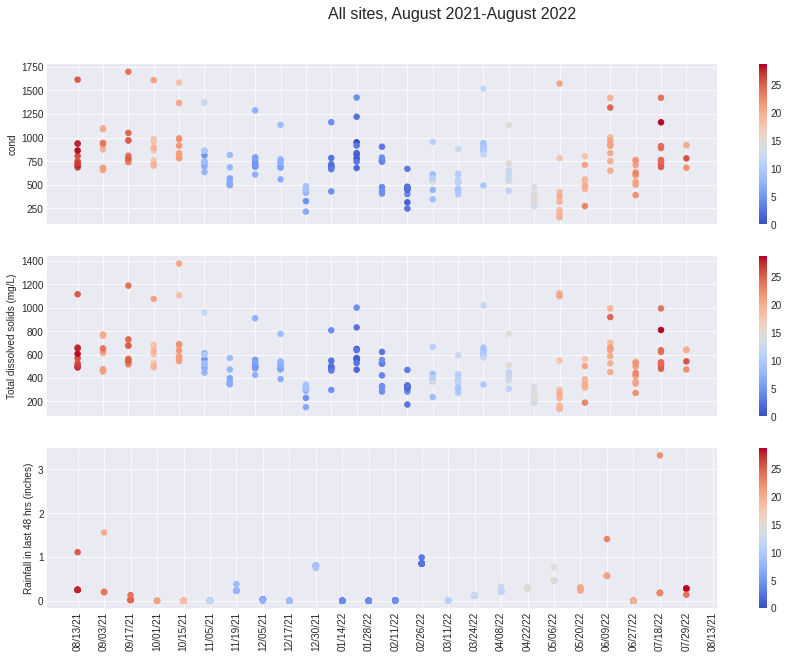

In [4]:
# plot the conductivity, total dissolved solids, and water temperature from August 2021 to August 2022

style.use("seaborn-darkgrid")

fig2, (ax1, ax2, ax3) = plt.subplots(3,1,sharey=False, figsize=(15,10))

fig2.suptitle('All sites, August 2021-August 2022', fontsize=16, y = 0.96)

orig_map=plt.cm.get_cmap('coolwarm')
reversed_map = orig_map

# Conductivity

biweek.plot(ax = ax1, kind='scatter', s = 30, \
            x='date', y= 'cond', c= biweek.temp, cmap = reversed_map)
ax1.set_ylabel('cond')
ax1.set_xlabel('')
ax1.set(xticklabels=[])
ax1.grid(True)

# Total dissolved solids

biweek.plot(ax = ax2, kind='scatter', s = 30, \
            x='date', y= 'tds', c = biweek.temp, cmap = reversed_map)
ax2.set_ylabel('Total dissolved solids (mg/L)')
ax2.set_xlabel('')
ax2.set(xticklabels=[])
ax2.grid(True)

# Rainfall in last 48 hrs 

biweek.plot(ax = ax3, kind='scatter', s = 30, \
            x='date', y= 'rainfall', c = biweek.temp, cmap = reversed_map)
ax3.set_ylabel('Rainfall in last 48 hrs (inches)')
ax3.set_xlabel('')
ax3.set_xticklabels(biweek.date, rotation = 90)
ax3.grid(True);

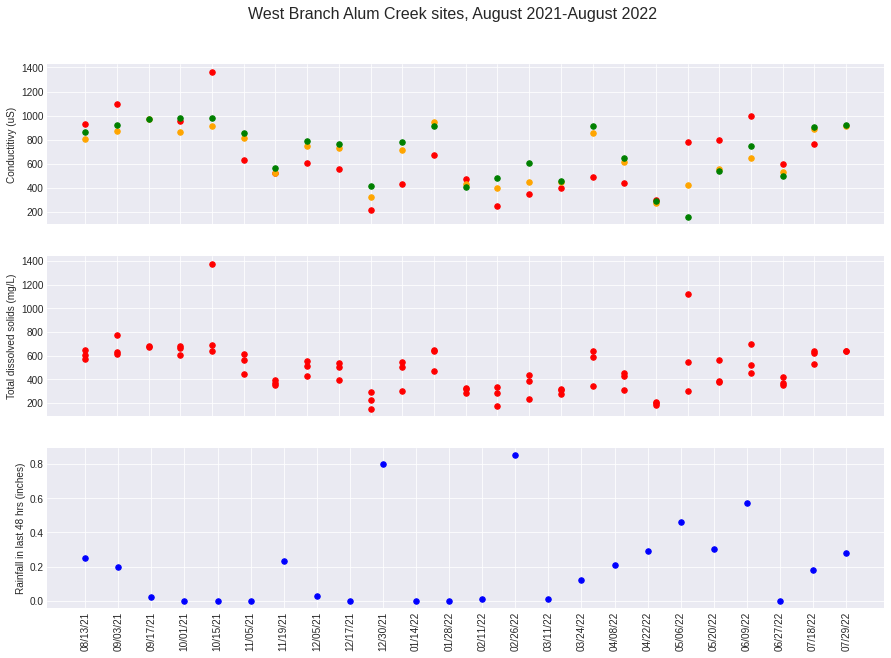

In [5]:
# Plot the West Brand Alum Creek sites (1,2,3)

style.use("seaborn-darkgrid")

fig2, (ax1, ax2, ax3) = plt.subplots(3,1,sharey=False, figsize=(15,10))

fig2.suptitle('West Branch Alum Creek sites, August 2021-August 2022', fontsize=16, y = 0.96)

# Conductivity

biweek1.plot(ax = ax1, kind='scatter', s = 30, \
            x='date', y= 'cond', c= 'red')

biweek2.plot(ax = ax1, kind='scatter', s = 30, \
            x='date', y= 'cond', c= 'orange')

biweek3.plot(ax = ax1, kind='scatter', s = 30, \
            x='date', y= 'cond', c= 'green')

ax1.set_ylabel('Conductitivy (uS)')
ax1.set_xlabel('')
ax1.set(xticklabels=[])
ax1.grid(True)

# Total dissolved solids

biweek1.plot(ax = ax2, kind='scatter', s = 30, \
            x='date', y= 'tds', c = 'red')

biweek2.plot(ax = ax2, kind='scatter', s = 30, \
            x='date', y= 'tds', c = 'red')

biweek3.plot(ax = ax2, kind='scatter', s = 30, \
            x='date', y= 'tds', c = 'red')

ax2.set_ylabel('Total dissolved solids (mg/L)')
ax2.set_xlabel('')
ax2.set(xticklabels=[])
ax2.grid(True)

# Rainfall in last 48 hrs 

biweek1.plot(ax = ax3, kind='scatter', s = 30, \
            x='date', y= 'rainfall', c = 'blue')
ax3.set_ylabel('Rainfall in last 48 hrs (inches)')
ax3.set_xlabel('')
ax3.set_xticklabels(biweek.date, rotation = 90)
ax3.grid(True);

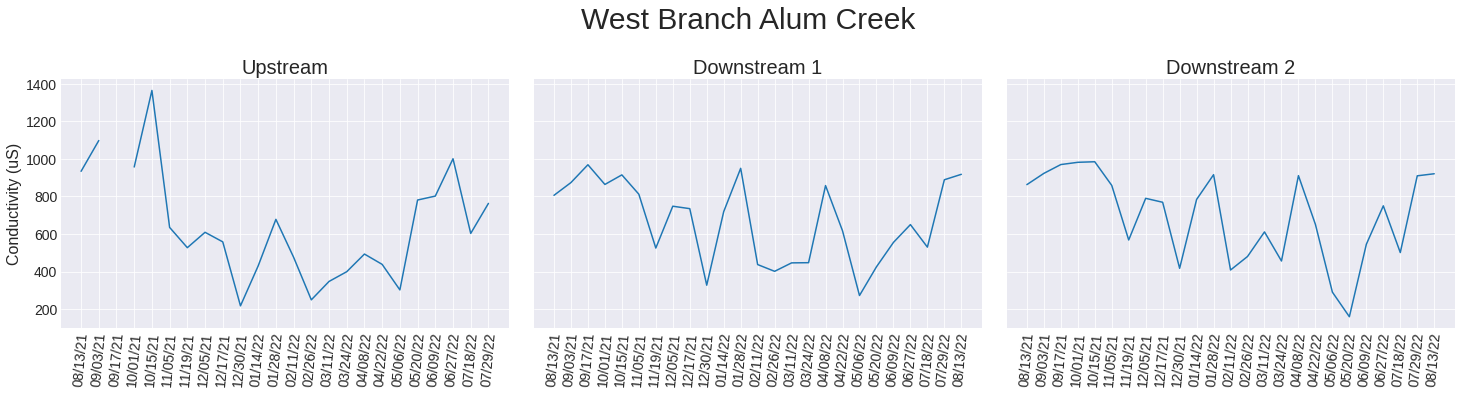

In [49]:
fig, axes = plt.subplots(1, 3, figsize=(20, 4), sharey = True)
fig.suptitle('West Branch Alum Creek ', fontsize=30, y = 1.2)
fig.tight_layout()

SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 20

axes[0].plot(biweek1.date, biweek1.cond)
axes[0].set_xticklabels(biweek1.date, rotation = 85, size=SMALL_SIZE)
axes[0].tick_params(axis='y', labelsize=14)
axes[0].set_ylabel('Conductivity (uS)', size=MEDIUM_SIZE)
axes[0].set_title('Upstream', size=BIGGER_SIZE)

axes[1].plot(biweek2.date, biweek2.cond)
axes[1].set_xticklabels(biweek2.date, rotation = 85, size=SMALL_SIZE)
axes[1].set_title('Downstream 1', size=BIGGER_SIZE)

axes[2].plot(biweek3.date, biweek3.cond)
axes[2].set_xticklabels(biweek3.date, rotation = 85, size=SMALL_SIZE)
axes[2].set_title('Downstream 2', size=BIGGER_SIZE);

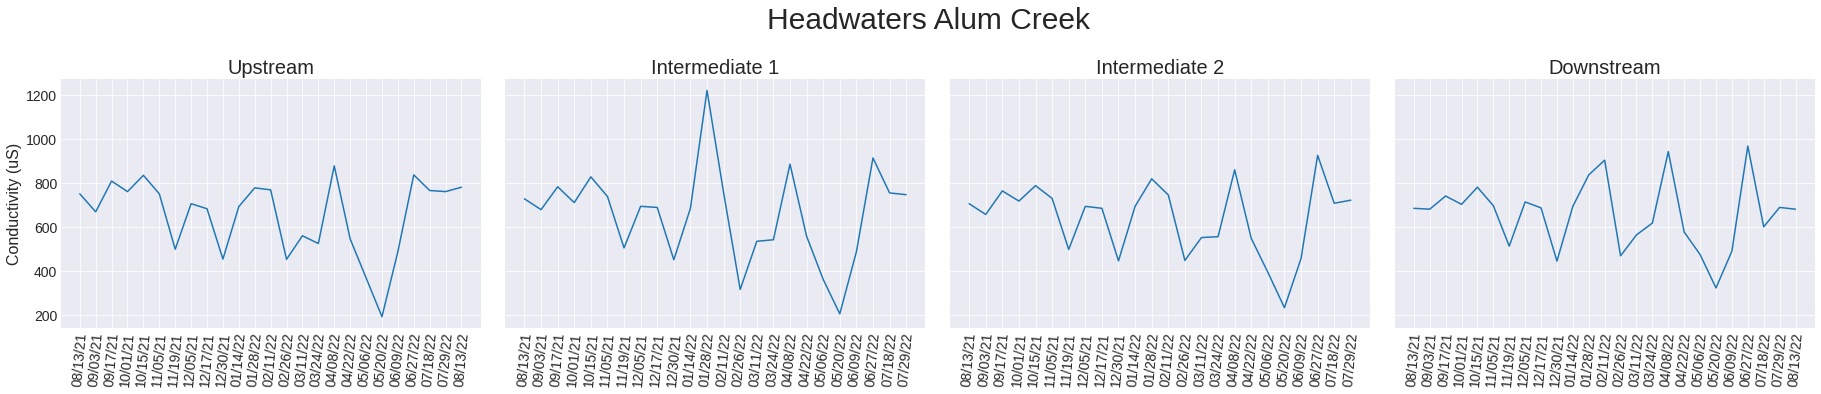

In [53]:
fig, axes = plt.subplots(1, 4, figsize=(25, 4), sharey = True)
fig.suptitle('Headwaters Alum Creek ', fontsize=30, y = 1.2)
fig.tight_layout()

SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 20

axes[0].plot(biweek4.date, biweek4.cond)
axes[0].set_xticklabels(biweek4.date, rotation = 85, size=SMALL_SIZE)
axes[0].tick_params(axis='y', labelsize=14)
axes[0].set_ylabel('Conductivity (uS)', size=MEDIUM_SIZE)
axes[0].set_title('Upstream', size=BIGGER_SIZE)

axes[1].plot(biweek7.date, biweek7.cond)
axes[1].set_xticklabels(biweek7.date, rotation = 85, size=SMALL_SIZE)
axes[1].set_title('Intermediate 1', size=BIGGER_SIZE)

axes[2].plot(biweek6.date, biweek6.cond)
axes[2].set_xticklabels(biweek6.date, rotation = 85, size=SMALL_SIZE)
axes[2].set_title('Intermediate 2', size=BIGGER_SIZE)

axes[3].plot(biweek5.date, biweek5.cond)
axes[3].set_xticklabels(biweek5.date, rotation = 85, size=SMALL_SIZE)
axes[3].set_title('Downstream', size=BIGGER_SIZE);